In [33]:
import pandas as pd
import random

In [34]:
L = []
for i in range(10000):
  a = random.randint(1,6)

  L.append(a)

In [35]:
len(L)

10000

In [36]:
L[:5]

[5, 1, 1, 6, 5]

In [37]:
s = pd.Series(L)
s

0       5
1       1
2       1
3       6
4       5
       ..
9995    4
9996    5
9997    3
9998    2
9999    4
Length: 10000, dtype: int64

In [38]:
s.value_counts()

3    1760
4    1692
6    1660
5    1648
1    1627
2    1613
dtype: int64

In [39]:
temp=s.value_counts()/pd.Series(L).value_counts().sum()
temp

3    0.1760
4    0.1692
6    0.1660
5    0.1648
1    0.1627
2    0.1613
dtype: float64

In [40]:
d=temp.sort_index()
d

1    0.1627
2    0.1613
3    0.1760
4    0.1692
5    0.1648
6    0.1660
dtype: float64

<Axes: >

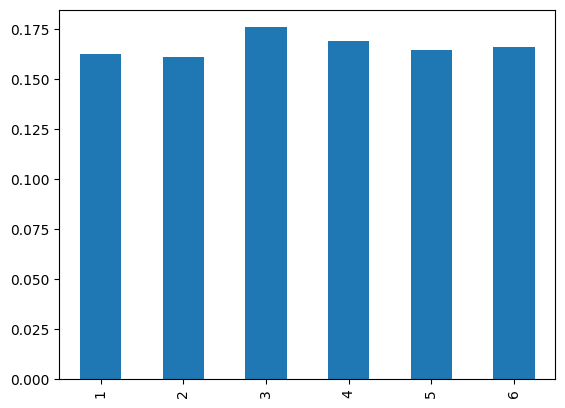

In [41]:
d.plot(kind='bar')

In [42]:
# theoritical it should be exact 1/6 but it is a random variable so roughly 1/6
#this is descrete prob. dens. func

In [43]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)
  len(L)

In [44]:
L[:5]

[9, 4, 7, 9, 11]

In [45]:
s=(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

2     0.0258
3     0.0564
4     0.0811
5     0.1091
6     0.1428
7     0.1636
8     0.1442
9     0.1073
10    0.0869
11    0.0571
12    0.0257
dtype: float64

<Axes: >

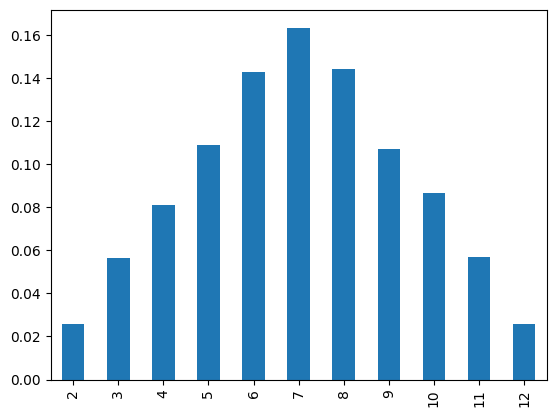

In [46]:
s.plot(kind='bar')

<Axes: >

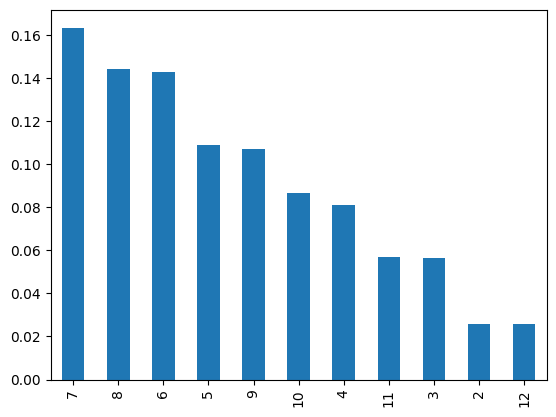

In [47]:
#without sorting
(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).plot(kind='bar')

In [48]:
import numpy as np
np.cumsum(s)

2     0.0258
3     0.0822
4     0.1633
5     0.2724
6     0.4152
7     0.5788
8     0.7230
9     0.8303
10    0.9172
11    0.9743
12    1.0000
dtype: float64

<Axes: >

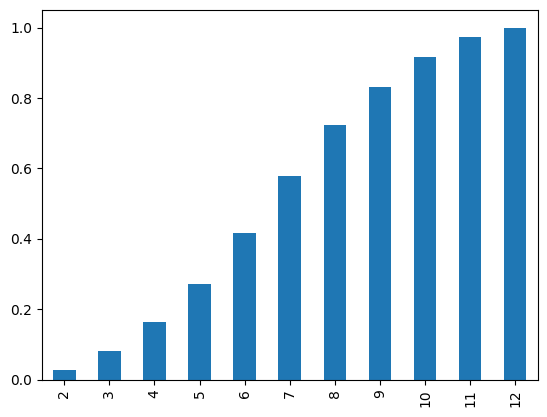

In [49]:
#Cumulative distribution function
np.cumsum(s).plot(kind='bar')

In [50]:
#probability density function(PDF)

In [51]:
#parametric density estimation

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000) #this give sample of 1000 points from populaition

In [53]:
#this sample mean and std is different from population which is obvious
sample.mean()

50.17013181370675

(array([  7.,  24.,  81., 129., 213., 224., 182.,  96.,  33.,  11.]),
 array([34.67244808, 37.65859544, 40.64474281, 43.63089018, 46.61703754,
        49.60318491, 52.58933227, 55.57547964, 58.56162701, 61.54777437,
        64.53392174]),
 <BarContainer object of 10 artists>)

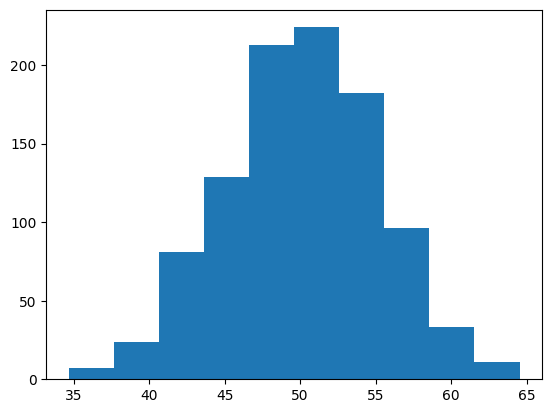

In [54]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [55]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [56]:
sample_mean,sample_std

(50.17013181370675, 5.057157857173086)

In [57]:
#now we need to estimate for population but here there is very less
#difference so we are not doing that step

In [58]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [59]:
values = np.linspace(sample.min(),sample.max(),100) #for every point between data
#min and max we apply that pdf function(normal dist pdf)

In [60]:
#dist is in scipy.stats.norm
probabilities = [dist.pdf(value) for value in values]

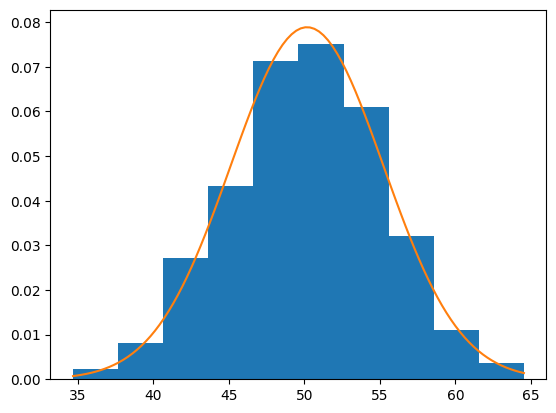

In [61]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<ipython-input-62-ba184d39d8b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample) #seaborn inbuilt calc this


<Axes: ylabel='Density'>

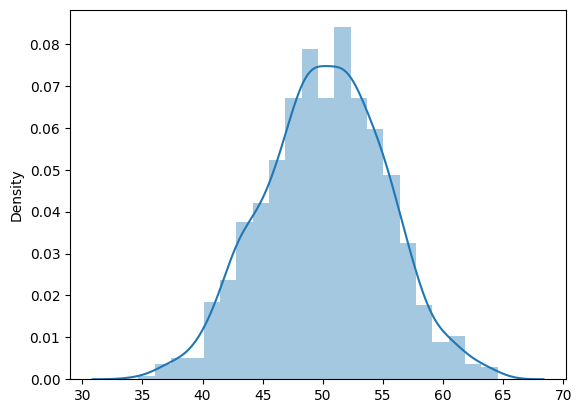

In [62]:
import seaborn as sns
sns.distplot(sample) #seaborn inbuilt calc this

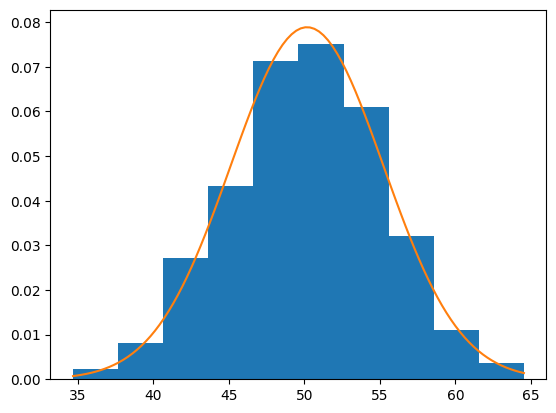

In [63]:
#trying mannually
def normal_dist(X,mean,std):
  y=(1/(np.sqrt(2*(np.pi))*std)) * np.exp(-0.5*((X-mean)/std)**2)
  return y
y=normal_dist(values,sample_mean, sample_std)
plt.hist(sample,bins=10,density=True) #need to do density true as other wise not proper scaled
plt.plot(values,y)

In [64]:
#depends on how better you estimate the parameters

In [66]:
#nonparametric density estimation
#this is done when we dont know data dist.
#using KDE here

In [67]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [68]:
sample[0:10]

array([12.20168132, 19.1953301 , 10.77358989, 22.69129991, 24.98790592,
       22.01893444, 17.17541056, 17.52964442, 14.65541612, 17.46961672])

(array([ 3.,  2.,  2.,  0.,  6.,  5.,  9.,  9., 14., 18., 21., 22., 19.,
        28., 20., 25., 19., 19., 21., 13., 10.,  9., 13.,  9., 20., 15.,
        22., 18., 29., 41., 43., 59., 58., 54., 61., 53., 39., 41., 46.,
        27., 19., 13.,  4.,  9.,  6.,  5.,  0.,  0.,  0.,  2.]),
 array([ 5.57919839,  6.6075824 ,  7.63596641,  8.66435042,  9.69273444,
        10.72111845, 11.74950246, 12.77788647, 13.80627048, 14.83465449,
        15.8630385 , 16.89142252, 17.91980653, 18.94819054, 19.97657455,
        21.00495856, 22.03334257, 23.06172659, 24.0901106 , 25.11849461,
        26.14687862, 27.17526263, 28.20364664, 29.23203066, 30.26041467,
        31.28879868, 32.31718269, 33.3455667 , 34.37395071, 35.40233473,
        36.43071874, 37.45910275, 38.48748676, 39.51587077, 40.54425478,
        41.5726388 , 42.60102281, 43.62940682, 44.65779083, 45.68617484,
        46.71455885, 47.74294287, 48.77132688, 49.79971089, 50.8280949 ,
        51.85647891, 52.88486292, 53.91324694, 54.94163095,

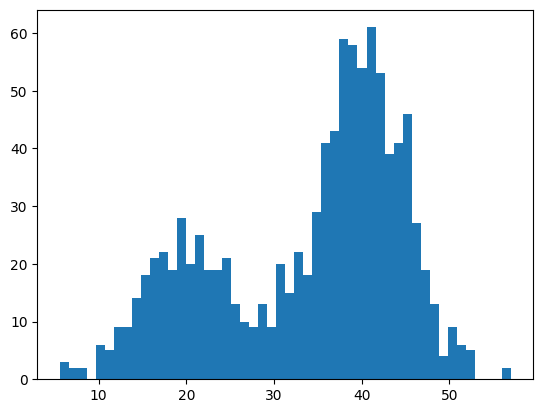

In [69]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [70]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

#data to a 2D array as ML model takes input as 2D array
sample = sample.reshape(-1, 1)

model.fit(sample)

KernelDensity(bandwidth=3)

In [72]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(-1, 1)

In [73]:
probabilities = model.score_samples(values) #for predicting for new values
probabilities = np.exp(probabilities)
#model.score_samples return values in log (log of the value ) so to convert to
#its normal form we do exponential fn

score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

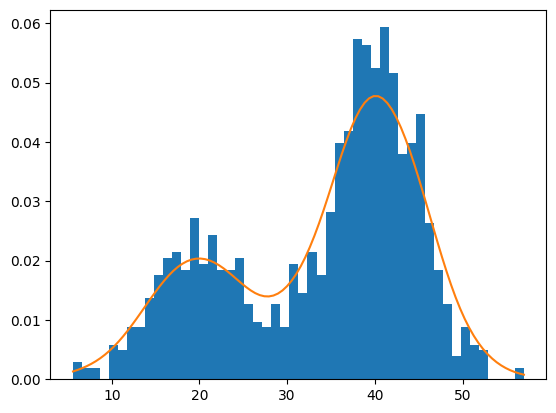

In [74]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

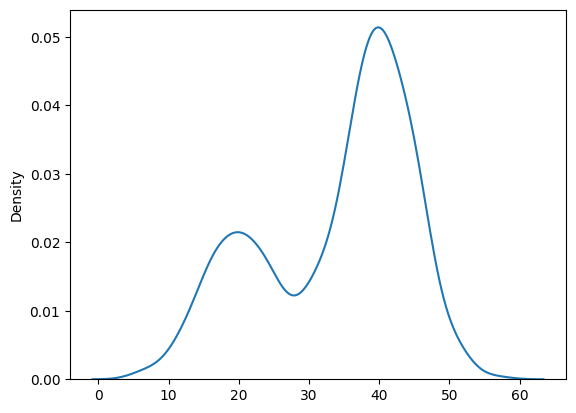

In [78]:
#by adjusting the Bandwidth we can change graph smoothness
sns.kdeplot(sample.reshape(1000),bw_adjust=0.8)